In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [21]:
df = pd.read_csv("../data/Dataset_financier.csv")
df.head()


,bilan_financier,actifs,revenu,depenses,taux_interet,flux_tresorerie,capital,agence,banque,lieu
0,57450.712295,29795.488056,2459.857380,546.096221,4.850180,9549.649146,36581.956747,Agence_Centre,Société Générale,Bafoussam
1,47926.035482,26472.435780,2884.385063,1069.807495,0.854030,6207.981496,38725.670920,Agence_Centre,UBA,Douala
2,59715.328072,20417.412589,2366.064063,1293.197233,9.724614,11458.554375,77179.593209,Agence_Sud,UBA,Bafoussam
3,72845.447846,15471.442556,2753.630776,2443.843829,5.180104,4151.884734,36901.898344,Agence_Centre,UBA,Douala
4,46487.699379,24887.563195,1485.108266,1778.276562,6.141862,3848.927628,46121.492335,Agence_Centre,Ecobank,Bafoussam


In [22]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bilan_financier  1000 non-null   float64
 1   actifs           1000 non-null   float64
 2   revenu           1000 non-null   float64
 3   depenses         1000 non-null   float64
 4   taux_interet     1000 non-null   float64
 5   flux_tresorerie  1000 non-null   float64
 6   capital          1000 non-null   float64
 7   agence           1000 non-null   object 
 8   banque           1000 non-null   object 
 9   lieu             1000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 78.3+ KB


In [23]:
df.describe()


,bilan_financier,actifs,revenu,depenses,taux_interet,flux_tresorerie,capital
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50289.980837,20495.853661,3004.667372,1490.640391,4.991526,9910.662587,39582.085591
std,14688.239073,6982.180641,786.763425,513.566263,2.901605,2963.913307,12364.166625
min,1380.989899,-582.720443,584.390275,35.275655,0.061838,1500.909130,5205.833442
25%,40286.145418,15756.308177,2481.600309,1131.289773,2.457276,7978.062358,30915.352716
50%,50379.509184,20441.539926,2999.799388,1500.092287,4.914739,9885.273463,39480.431990
75%,59719.158132,25102.175239,3528.732251,1833.472705,7.538136,11879.381786,48259.573668
max,107790.972360,42351.752975,6140.990165,3121.546485,9.993503,19338.730603,77179.593209


In [24]:
df.isnull().sum()


bilan_financier    0
actifs             0
revenu             0
depenses           0
taux_interet       0
flux_tresorerie    0
capital            0
agence             0
banque             0
lieu               0
dtype: int64

In [25]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Colonnes numériques :", numeric_cols.tolist())
print("Colonnes catégorielles :", categorical_cols.tolist())


Colonnes numériques : ['bilan_financier', 'actifs', 'revenu', 'depenses', 'taux_interet', 'flux_tresorerie', 'capital']
Colonnes catégorielles : ['agence', 'banque', 'lieu']


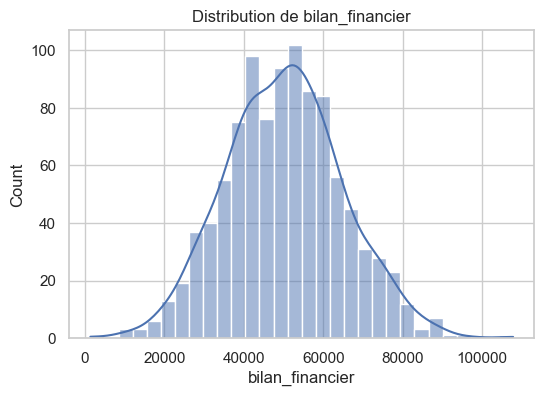

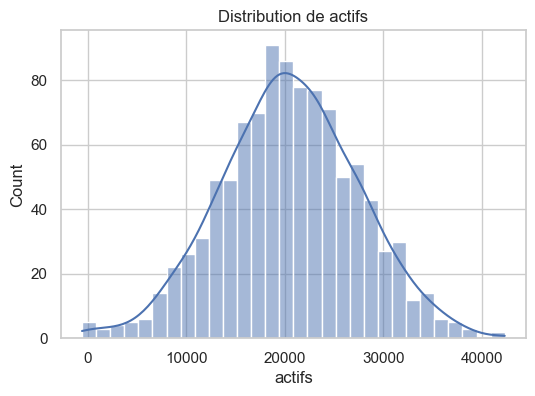

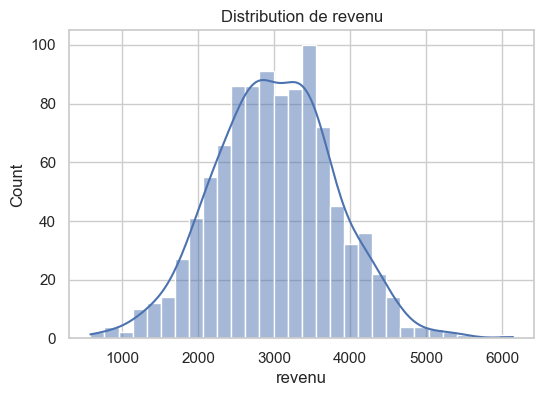

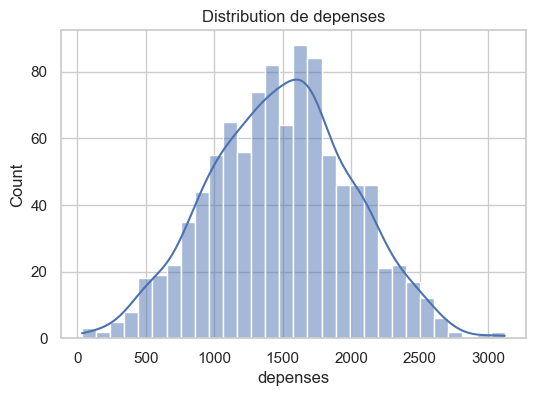

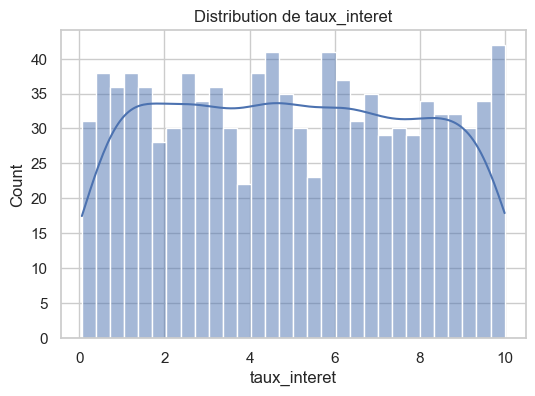

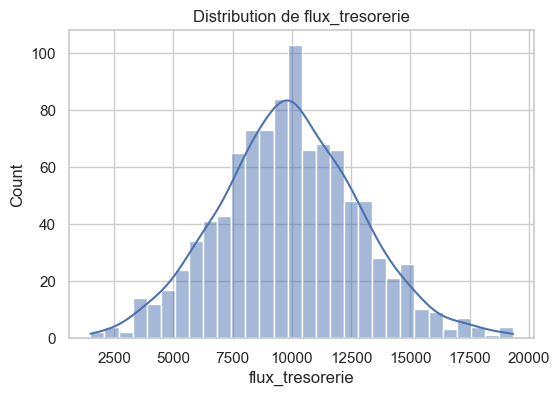

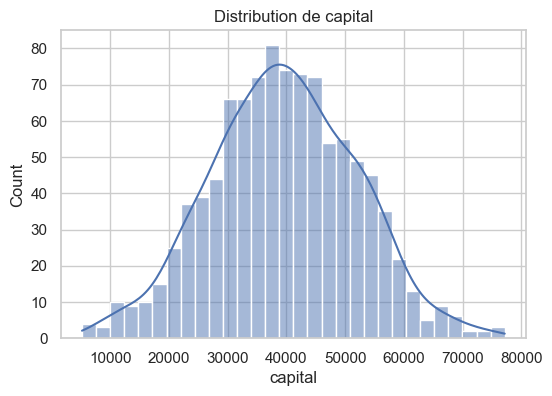

In [26]:
# Statistiques descriptives
df[numeric_cols].describe()

# Distribution de chaque variable numérique
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()


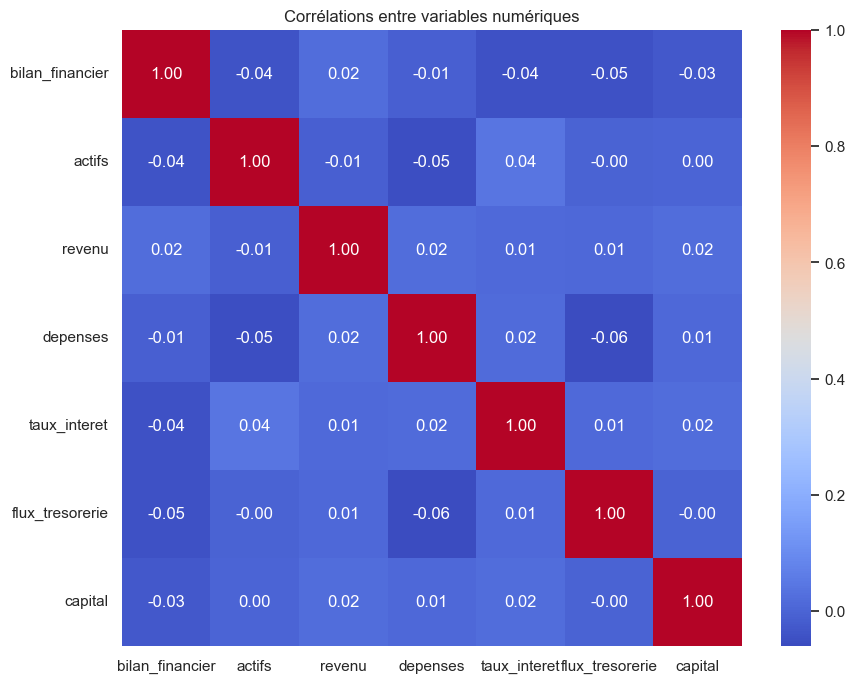

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre variables numériques")
plt.show()


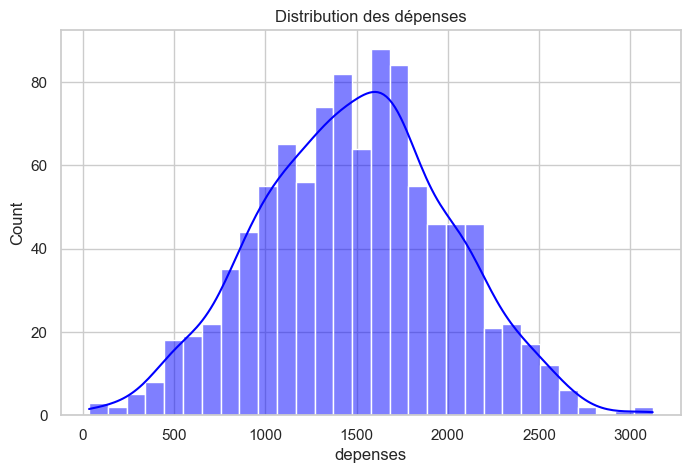

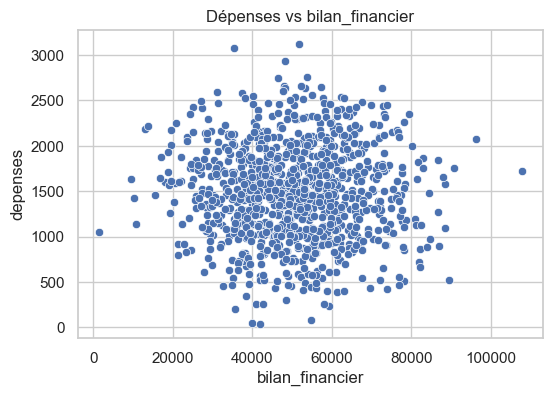

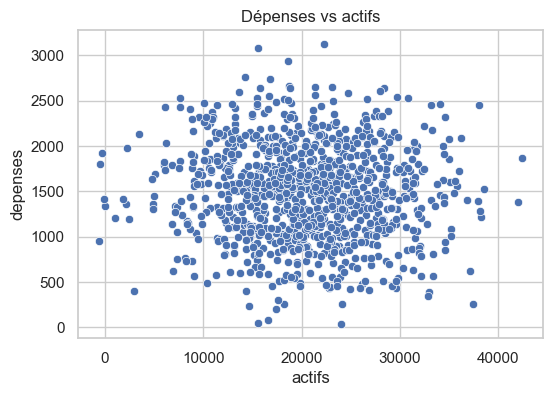

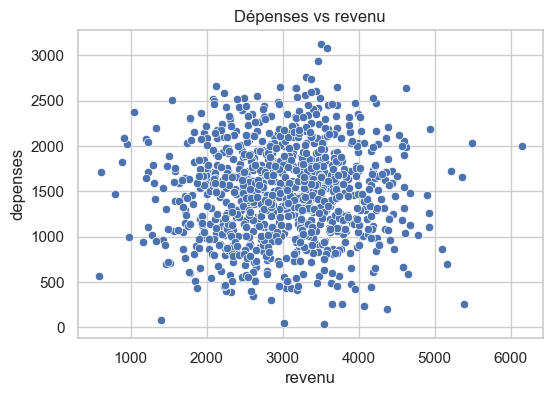

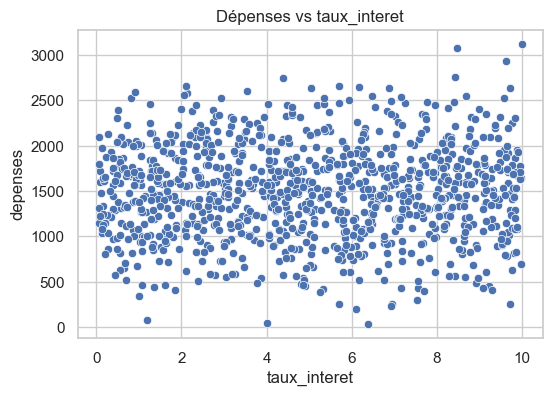

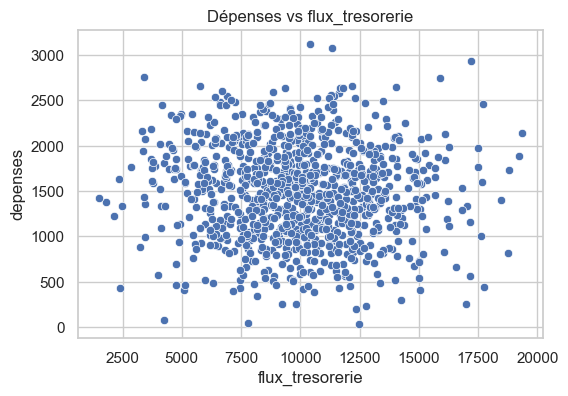

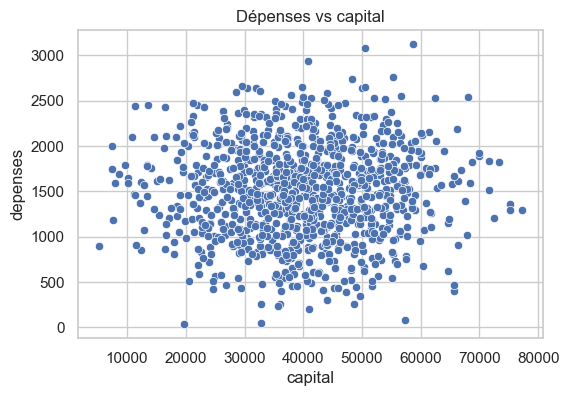

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df["depenses"], kde=True, bins=30, color="blue")
plt.title("Distribution des dépenses")
plt.show()

# Relation entre depenses et autres variables numériques
for col in numeric_cols:
    if col != "depenses":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df["depenses"])
        plt.title(f"Dépenses vs {col}")
        plt.show()



In [29]:
# Valeurs négatives ou incohérentes
for col in numeric_cols:
    anomalies = df[df[col] < 0]
    if not anomalies.empty:
        print(f"Anomalies détectées dans {col} :")
        print(anomalies)


Anomalies détectées dans actifs :
     bilan_financier      actifs       revenu     depenses  taux_interet  \
101     43690.320159 -273.787647  2278.358757  1927.777830      0.344313   
539     41346.621957 -105.835493  3043.947289  1419.819959      6.707650   
591     42835.138299 -449.453384  2634.158676  1802.060445      5.787565   
971     39784.225138 -582.720443  2945.092763   948.865130      1.608603   

     flux_tresorerie       capital      agence            banque       lieu  
101      9970.465574  52080.760855  Agence_Sud  Société Générale     Garoua  
539     13579.933018  36537.098594  Agence_Sud              BGFI     Garoua  
591     10069.587936  55215.525845  Agence_Sud              BGFI    Yaoundé  
971      9043.460934  44963.395091  Agence_Sud           Ecobank  Bafoussam  


In [30]:
df = df[df["actifs"] >= 0]

# Conclusion de l'exploration des données

### 1. Distribution des variables numériques
- Les histogrammes montrent que certaines variables (ex. `revenu`, `flux_tresorerie`) suivent une distribution relativement concentrée, tandis que d'autres (`depenses`, `capital`) présentent une forte dispersion avec des valeurs extrêmes.
- La variable cible `depenses` est asymétrique : certaines observations ont des dépenses très élevées, ce qui peut influencer le modèle. Une normalisation ou transformation sera nécessaire.

### 2. Corrélations
- La matrice de corrélation révèle des relations intéressantes :
  - `depenses` est **modérément corrélée** avec `revenu` et `flux_tresorerie`, ce qui suggère que ces variables influencent directement les dépenses.
  - `actifs` et `capital` sont fortement corrélés entre eux, ce qui indique une redondance possible.
  - `taux_interet` semble faiblement corrélé avec la plupart des variables, donc son impact sur les dépenses pourrait être limité.

### 3. Anomalies
- Quatre lignes avec des valeurs négatives dans `actifs` ont été détectées et supprimées.
- Cette correction améliore la cohérence du dataset et évite de fausser l'entraînement du modèle.

### 4. Implications pour la suite
- Les variables numériques devront être **normalisées** avant d'entraîner un SVM, car elles sont sur des échelles différentes.
- Les variables catégorielles (`agence`, `banque`, `lieu`) devront être **encodées** pour être intégrées au modèle.
- Les corrélations observées guideront le choix des features les plus pertinentes pour prédire `depenses`.

---

